In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space
plt.style.use('dark_background')
%matplotlib notebook

In [111]:
image_points_1 = np.mat([
    [381, 402],
    [452, 497],
    [671, 538],
    [501, 254],
    [506, 381],
    [474, 440],
    [471, 537],
    [498, 364],
    [706, 319],
    [635, 367],
])

image_points_2 = np.mat([
    [390, 346],
    [439, 412],
    [651, 417],
    [477, 194],
    [482, 300],
    [456, 359],
    [454, 444],
    [475, 287],
    [686, 185],
    [606, 253],
])

F_matrix = np.mat([
    [-1.29750186e-06,  8.07894025e-07,  1.84071967e-03],
    [ 3.54098411e-06,  1.05620725e-06, -8.90168709e-03],
    [-3.29878312e-03,  5.14822628e-03,  1.00000000e+00],
])

In [106]:
def getLine(F, x):
    ''' Function to get the epipolar line given the image coordinate and Fundamental Matrix'''
    print(x.shape)
    return F @ x

In [107]:
image_points_1 = np.concatenate((image_points_1, np.ones((10,1))), axis=1)
image_points_2 = np.concatenate((image_points_2, np.ones((10,1))), axis=1)
epipolar_lines_1 = getLine(F_matrix.T, image_points_2.T).T
epipolar_lines_2 = getLine(F_matrix, image_points_1.T).T

(3, 10)
(3, 10)


<IPython.core.display.Javascript object>


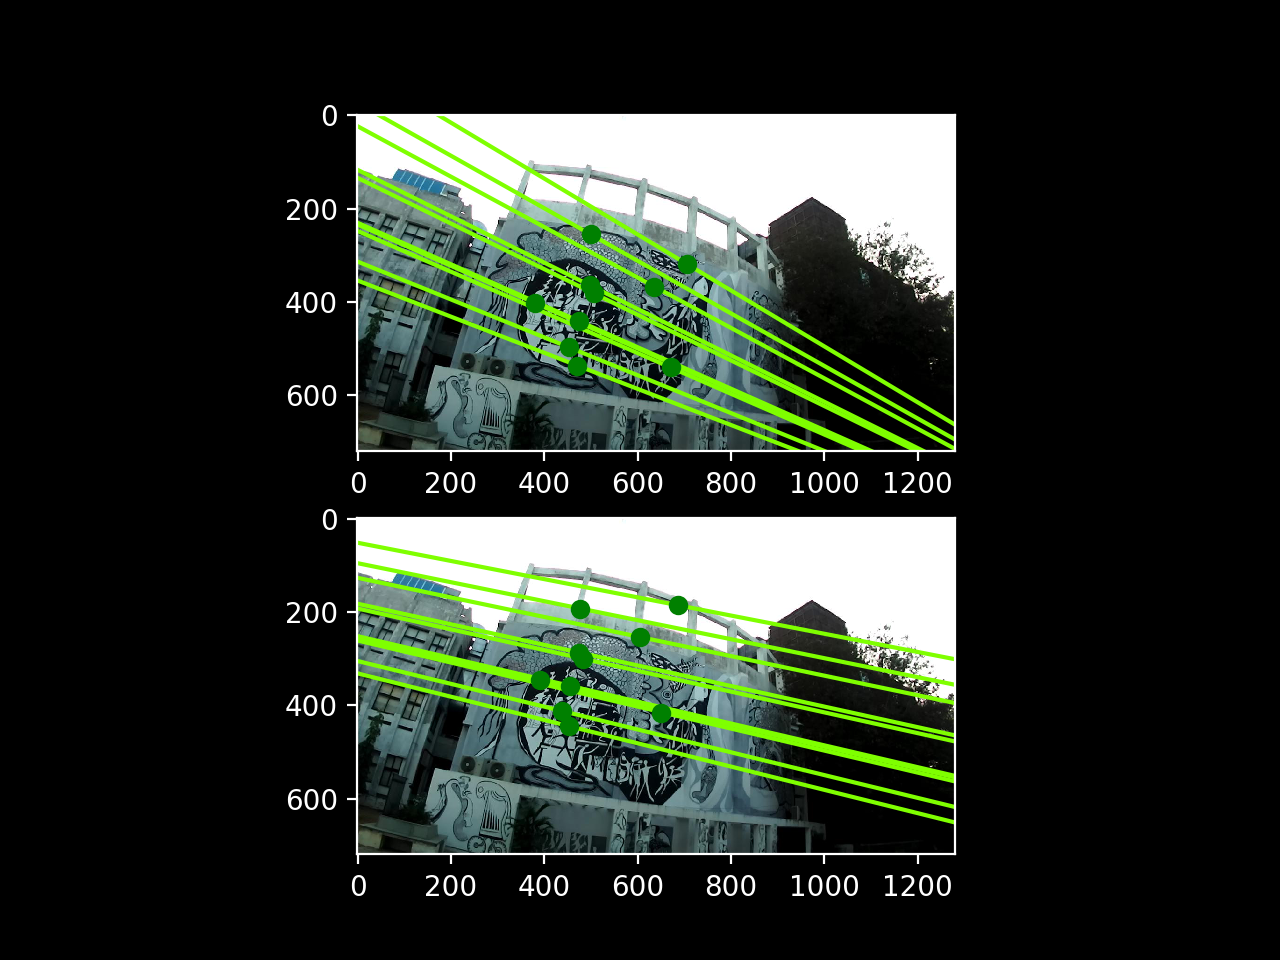

In [108]:
x = np.linspace(0,1500)
y1 = - (epipolar_lines_1[:,0] @ [x] + epipolar_lines_1[:,2]) / epipolar_lines_1[:,1]
y2 = - (epipolar_lines_2[:,0] @ [x] + epipolar_lines_2[:,2]) / epipolar_lines_2[:,1]
x.reshape((x.shape[0], 1))


plt.subplot(211)
image1 = plt.imread('img1.jpg')
plt.plot(x,y1.T,'chartreuse')
plt.plot(image_points_1[:,0],image_points_1[:,1],'go')
plt.imshow(image1)


plt.subplot(212)
image2 = plt.imread('img2.jpg')
plt.plot(x,y2.T,'chartreuse')
plt.plot(image_points_2[:,0],image_points_2[:,1],'go')
plt.imshow(image1)

plt.show()

In [126]:
u, s, vh = np.linalg.svd(F_matrix, full_matrices=True)
s[2] = 0
F = u @ np.diag(s) @ vh

epipole1 = null_space(F)
epipole1[0,:] /= epipole1[2,:]
epipole1[1,:] /= epipole1[2,:]
epipole1[2,:] /= epipole1[2,:]
print("Epipole 1 ",epipole1.T)

epipole2 = null_space(F.T)
epipole2[0,:] /= epipole2[2,:]
epipole2[1,:] /= epipole2[2,:]
epipole2[2,:] /= epipole2[2,:]
print("Epipole 2 ",epipole2.T)

Epipole 1  [[2.15916628e+03 1.18926810e+03 1.00000000e+00]]
Epipole 2  [[-5.13190964e+03 -9.48854631e+02  1.00000000e+00]]
